# Homework 5
## Md. Abdullah-Al MAmun


## 1.	Create a class and name it Z-test: 
 
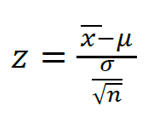

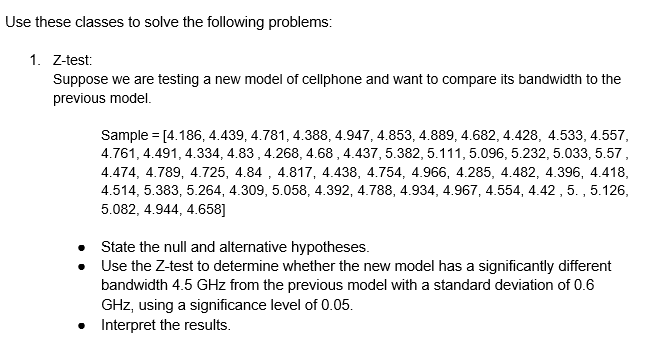


In [2]:
from scipy.stats import norm

class Z_test:
    def __init__(self, sample, pop_mean, pop_std):
        self.sample = sample
        self.pop_mean = pop_mean
        self.pop_std = pop_std
        
    def test_statistic(self, alpha = 0.05):        
        H0 = f' The bandwidth of the new model is not significantly different from the previous model, i.e., µ0 = 4.5 GHz.'
        H1 = f' The bandwidth of the new model is significantly different from the previous model, i.e., µ0 ≠ 4.5 GHz.'
        
        sample_mean = sum(self.sample) / len(self.sample)
        sample_size = len(self.sample)
        z_score = (sample_mean - self.pop_mean) / (self.pop_std / (sample_size ** 0.5))
        
        p_value = 2 * (1 - norm.cdf(abs(z_score)))
             
        if p_value < alpha:
            print("Null hypothesis rejected.", H1)
        else:
            print("Fail to reject null hypothesis.", H0)

In [3]:
sample = [4.186, 4.439, 4.781, 4.388, 4.947, 4.853, 4.889, 4.682, 4.428, 4.533, 4.557, 4.761, 4.491, 4.334, 4.83, 4.268, 4.68, 4.437, 5.382, 5.111, 5.096, 5.232, 5.033, 5.57, 4.474, 4.789, 4.725, 4.84, 4.817, 4.438, 4.754, 4.966, 4.285, 4.482, 4.396, 4.418, 4.514, 5.383, 5.264, 4.309, 5.058, 4.392, 4.788, 4.934, 4.967, 4.554, 4.42, 5., 5.126, 5.082, 4.944, 4.658]

pop_mean=4.5
pop_std=0.6

z_test=Z_test(sample, pop_mean, pop_std)
z_test.test_statistic()

Null hypothesis rejected.  The bandwidth of the new model is significantly different from the previous model, i.e., µ0 ≠ 4.5 GHz.


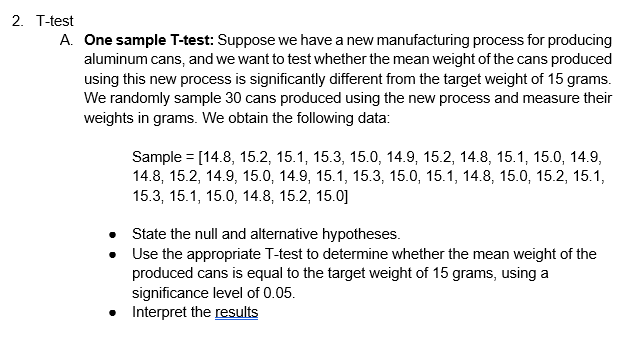
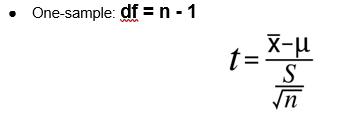


In [69]:
from scipy.stats import t

class OneSampleTTest:
    def __init__(self, sample, pop_mean):
        self.sample = sample
        self.pop_mean = pop_mean

    def check_significance(self, alpha = 0.05):
        
        H0 = "The mean weight of the cans produced using the new process is not equal to the target weight of 15 grams"
        H1 = "The mean weight of the cans produced using the new process is equal to the target weight of 15 grams"
        
        sample_mean = sum(self.sample) / len(self.sample)
        sample_std = (sum([(x - sample_mean) ** 2 for x in self.sample]) / (len(self.sample) - 1)) ** 0.5
        sample_size = len(self.sample)
        t_statistic = (sample_mean - self.pop_mean) / (sample_std / (sample_size ** 0.5))
        
        p_value = 2 * (1 - norm.cdf(abs(t_statistic)))
             
        if p_value < alpha:
            print("Null hypothesis rejected.", H1)
        else:
            print("Fail to reject null hypothesis.", H0)

sample = [14.8, 15.2, 15.1, 15.3, 15.0, 14.9, 15.2, 14.8, 15.1, 15.0, 14.9, 14.8, 15.2, 14.9, 15.0, 14.9, 15.1, 15.3, 15.0, 15.1, 14.8, 15.0, 15.2, 15.1, 15.3, 15.1, 15.0, 14.8, 15.2, 15.0]

t_test = OneSampleTTest(sample, 15)
t_test.check_significance()

Fail to reject null hypothesis. The mean weight of the cans produced using the new process is not equal to the target weight of 15 grams


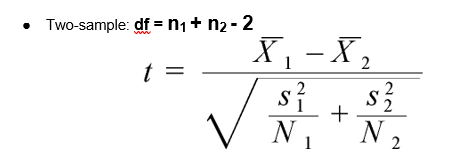

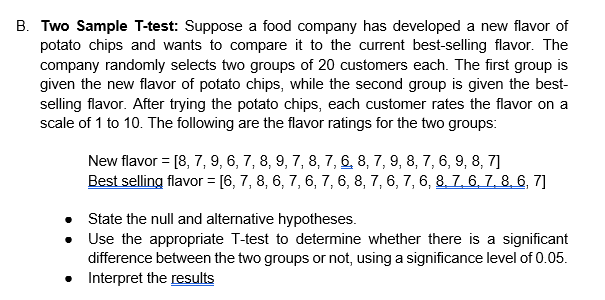

In [63]:
from scipy.stats import t, norm

class TwoSampleTTest:
    def __init__(self, sample1, sample2):
        self.sample1 = sample1
        self.sample2 = sample2

    def check_significance(self, alpha = 0.05):
        
        H0 = f' There is no significant difference between the mean flavor ratings of the new flavor and the best-selling flavor.'
        H1 = f' There is a significant difference between the mean flavor ratings of the two flavors.'
                
        mean1 = sum(self.sample1) / len(self.sample1)
        mean2 = sum(self.sample2) / len(self.sample2)
        std1 = ((sum([(x-mean1)**2 for x in self.sample1]))/(len(self.sample1)-1))**(1/2)
        std2 = ((sum([(x-mean2)**2 for x in self.sample2]))/(len(self.sample2)-1))**(1/2)
        n1 = len(self.sample1)
        n2 = len(self.sample2)
        t_statistic = (mean1-mean2)/(((std1**2)/n1 + (std2**2)/n2)**(1/2))
        
        p_value = 2 * (1 - norm.cdf(abs(t_statistic)))
             
        if p_value < alpha:
            print("Null hypothesis rejected.", H1)
        else:
            print("Fail to reject null hypothesis.", H0)      

# This means that the new flavor is not significantly better or worse than the best-selling flavor. 

new_flavor = [8, 7, 9, 6, 7, 8, 9, 7, 8, 7, 6, 8, 7, 9, 8, 7, 6, 9, 8, 7]
best_selling_flavor = [6, 7, 8, 6, 7, 6, 7, 6, 8, 7, 6, 7, 6, 8, 7, 6, 7, 8, 6, 7]

t_test = TwoSampleTTest(new_flavor, best_selling_flavor)
t_test.check_significance()

Null hypothesis rejected.  There is a significant difference between the mean flavor ratings of the two flavors.


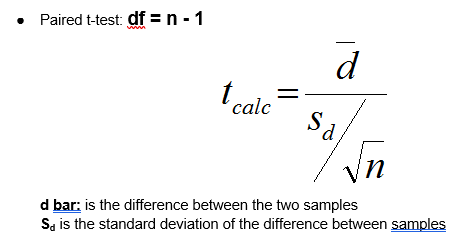

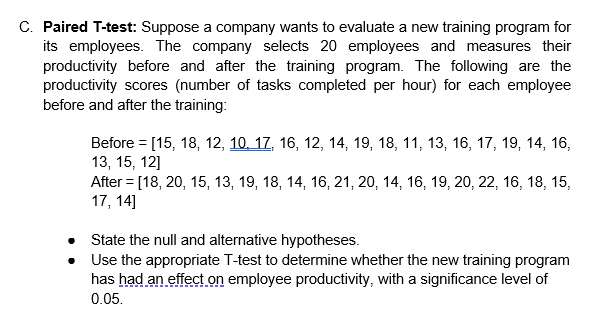

In [64]:
from scipy.stats import t

class PairedTTest:
    
    def __init__(self, before, after):
        self.before = before
        self.after = after
        
    def check_significance(self, alpha = 0.05):
        
        H0 = 'There is no significant difference in productivity scores before and after training.'
        H1 = 'There is a significant difference in productivity scores before and after training.'
               
        dof = len(self.before) - 1
        diffs = [self.after[i] - self.before[i] for i in range(len(self.before))]
        mean_diff = sum(diffs) / len(diffs)
        std_diff = (sum([(d - mean_diff)**2 for d in diffs]) / dof)**0.5        
        t_stat = mean_diff / (std_diff / len(diffs)**0.5)
        
        p_value = (1 - t.cdf(abs(t_stat), dof)) * 2
        
        if p_value < alpha:
            print("Null hypothesis rejected.", H1)
        else:
            print("Fail to reject null hypothesis.", H0)      
        
before = [15, 18, 12, 10, 17, 16, 12, 14, 19, 18, 11, 13, 16, 17, 19, 14, 16, 13, 15, 12]
after = [18, 20, 15, 13, 19, 18, 14, 16, 21, 20, 14, 16, 19, 20, 22, 16, 18, 15, 17, 14]

t_test = PairedTTest(before, after)
t_test.check_significance()

Null hypothesis rejected. There is a significant difference in productivity scores before and after training.


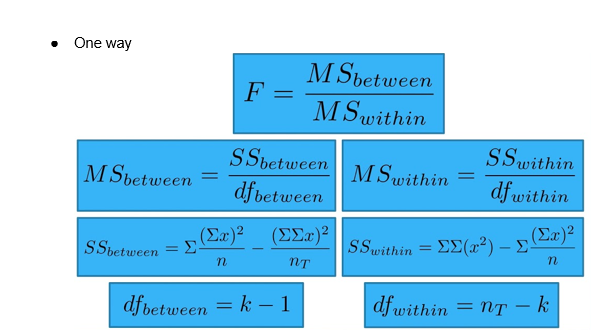
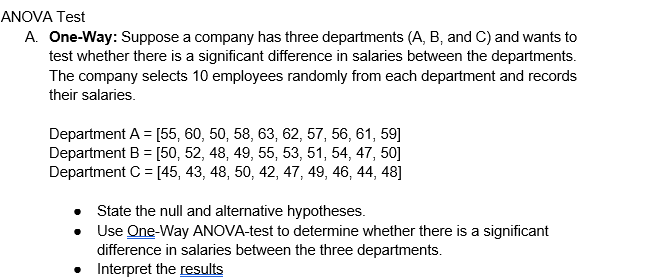


In [65]:
class OneWayANOVA:
    def __init__(self, *groups):
        self.groups = groups

    def check_significance(self, alpha = 0.05):        

        H0 = 'There is no significant difference in means between groups.'
        H1 = 'There is a significant difference in means between groups.'

        k = len(self.groups)
        N_T = sum(len(group) for group in self.groups) #  total sample size for  all groups

        grand_mean = sum(value for group in self.groups for value in group) / N_T

        SS_B = sum(len(group) * (np.mean(group) - grand_mean)**2 for group in self.groups)
        df_B = k - 1
        MS_B = SS_B / df_B

        SS_W = sum(sum((value - np.mean(group))**2 for value in group) for group in self.groups)
        df_W = N_T - k
        MS_W = SS_W / df_W

        TSS = SS_B + SS_W

        F_statistic = MS_B / MS_W
        p_value = 1 - f.cdf(F_statistic, df_B, df_W)

        self.p_value = p_value

        if self.p_value < alpha:
            print("Null hypothesis rejected.", H1)
        else:
            print("Fail to reject null hypothesis.", H0)


In [66]:
import numpy as np

department_A = [55, 60, 50, 58, 63, 62, 57, 56, 61, 59]
department_B = [50, 52, 48, 49, 55, 53, 51, 54, 47, 50]
department_C = [45, 43, 48, 50, 42, 47, 49, 46, 44, 48]

test = OneWayANOVA(department_A, department_B, department_C)
test.check_significance()

Null hypothesis rejected. There is a significant difference in means between groups.


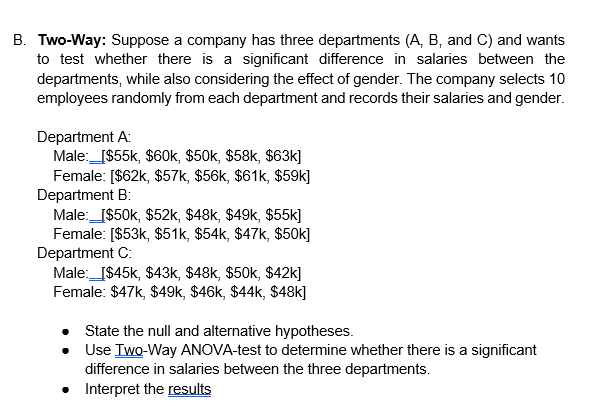
### Two-ways using scipy library

In [53]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# data
data = pd.DataFrame({
    'salary': [55000, 60000, 50000, 58000, 63000, 62000, 57000, 56000, 61000, 59000, 50000, 52000, 48000, 49000, 55000, 53000, 51000, 54000, 47000, 50000, 45000, 43000, 48000, 50000, 42000, 47000, 49000, 46000, 44000, 48000],
    'department': ['A']*10 + ['B']*10 + ['C']*10,
    'gender': ['Male']*5 + ['Female']*5 + ['Male']*5 + ['Female']*5 + ['Male']*5 + ['Female']*5
})


# two-way ANOVA to test for significance
model = ols('salary ~ department + gender + department:gender', data=data).fit()
table = sm.stats.anova_lm(model, typ=2)

print(table)

state the null and alternative hypotheses:
H0: There is no significant difference in salaries between the three departments, and gender has no effect on salaries.
H1: There is a significant difference in salaries between at least two of the three departments, and/or gender has an effect on salaries.
                         sum_sq    df          F        PR(>F)
department         7.184667e+08   2.0  35.104235  7.472321e-08
gender             8.533333e+06   1.0   0.833876  3.702368e-01
department:gender  3.266667e+06   2.0   0.159609  8.533743e-01
Residual           2.456000e+08  24.0        NaN           NaN


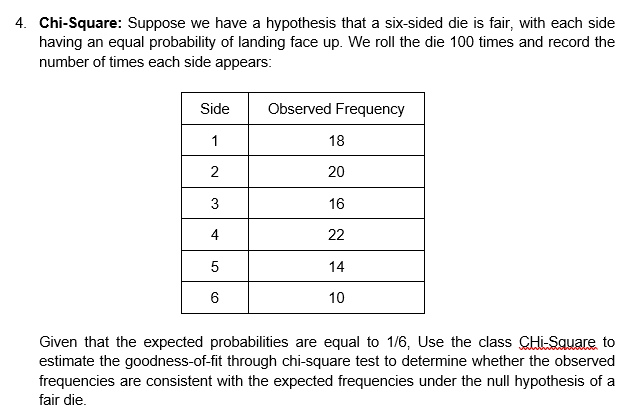

In [46]:
import scipy.stats as stats

class ChiSquare:
    def __init__(self, observed_freq, expected_prob):
        self.observed_freq = observed_freq
        self.expected_prob = expected_prob
    
    def test(self, alpha=0.05):
        H0 = 'The die is not fair.'
        H1 = 'The die is fair.'
        
        self.expected_freq = [prob * sum(self.observed_freq) for prob in self.expected_prob]
        chi_square = sum([((observed - expected) ** 2) / expected for observed, expected in zip(self.observed_freq, self.expected_freq)])
        df = len(self.observed_freq) - 1
        p_value = 1 - stats.chi2.cdf(chi_square, df)
        
        if p_value < alpha:
            print("Reject null hypothesis:", H1)
        else:
            print("Fail to reject null hypothesis:", H0)

# instance of the class and test the hypothesis
observed_freq = [18, 20, 16, 22, 14, 10]
expected_prob = [1/6] * 6

test = ChiSquare(observed_freq, expected_prob)
test.test()


Fail to reject null hypothesis: The die is not fair.


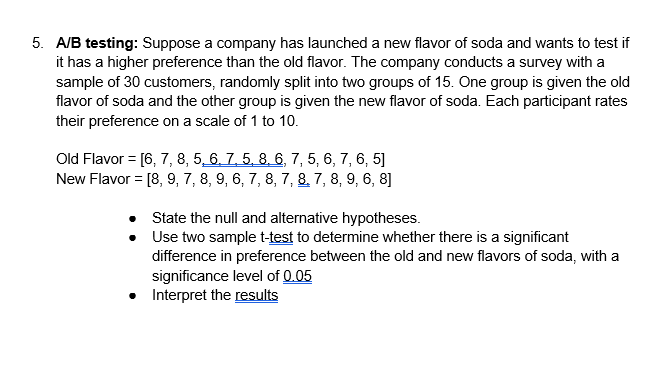

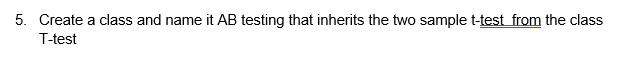

In [67]:
from scipy.stats import t, norm

class TwoSampleTTest:
    def __init__(self, sample1, sample2):
        self.sample1 = sample1
        self.sample2 = sample2

    def check_significance(self, alpha = 0.05):
        
        H0= 'The mean flavor rating of the new soda is not significantly different from that of the old soda.'
        H1="The mean flavor rating of the new soda is significantly higher than that of the old soda."
        
        mean1 = sum(self.sample1) / len(self.sample1)
        mean2 = sum(self.sample2) / len(self.sample2)
        std1 = ((sum([(x-mean1)**2 for x in self.sample1]))/(len(self.sample1)-1))**(1/2)
        std2 = ((sum([(x-mean2)**2 for x in self.sample2]))/(len(self.sample2)-1))**(1/2)
        n1 = len(self.sample1)
        n2 = len(self.sample2)
        t_statistic = (mean1-mean2)/(((std1**2)/n1 + (std2**2)/n2)**(1/2))
        
        p_value = 2 * (1 - norm.cdf(abs(t_statistic)))
             
        if p_value < alpha:
            print("Null hypothesis rejected.", H1)
        else:
            print("Fail to reject null hypothesis.", H0)    
            

class ABTesting(TwoSampleTTest):
    def __init__(self, old_data, new_data):
        super().__init__(old_data, new_data)  

    def test_statistic(self):
        mean1 = sum(self.sample1) / len(self.sample1)
        mean2 = sum(self.sample2) / len(self.sample2)
        std1 = ((sum([(x-mean1)**2 for x in self.sample1]))/(len(self.sample1)-1))**(1/2)
        std2 = ((sum([(x-mean2)**2 for x in self.sample2]))/(len(self.sample2)-1))**(1/2)
        n1 = len(self.sample1)
        n2 = len(self.sample2)
        t_statistic = (mean1-mean2)/(((std1**2)/n1 + (std2**2)/n2)**(1/2))      
       
        df = len(self.sample1) + len(self.sample2) - 2
        p_value = 1 - t.cdf(abs(t_statistic), df)
        print("T-statistic: {:.3f}".format(t_statistic))
        print("Degrees of freedom: {}".format(df))
        print("P-value: {:.4f}".format(p_value))
        self.check_significance()


old_flavor = [6, 7, 8, 5, 6, 7, 5, 8, 6, 7, 5, 6, 7, 6, 5]
new_flavor = [8, 9, 7, 8, 9, 6, 7, 8, 7, 8, 7, 8, 9, 6, 8]

ab_test = ABTesting(old_flavor, new_flavor)
ab_test.test_statistic()

T-statistic: -3.816
Degrees of freedom: 28
P-value: 0.0003
Null hypothesis rejected. The mean flavor rating of the new soda is significantly higher than that of the old soda.
